# Final Project: Is There a Relationship Between Director and Total Gross Revenue

by Chalvin Soenarjo

# Foreword

This notebook will be showing some exploratory data analysis for the `Disney` dataset located [here](https://data.world/kgarrett/disney-character-success-00-16). This document will provide you with an idea of what a typical project report should look like for this course. Here I am analyzing the `Disney` dataset. However, for the project, you will be analyzing the `Disney` dataset. More information about that is available on the course `canvas` page.


# Introduction

Disney, one of the world's most iconic entertainment companies, has a rich history of producing beloved films that have not only captured the hearts of audiences but also achieved remarkable success at the box office. In this analysis, we delve into the world of Disney movies, with a specific focus on determining the top 10 highest-grossing Disney movies of all time. Additionally, we aim to identify and recognize the directors who have been most successful in terms of generating box office revenue for Disney.

## Question(s) of Interest

The central question that drives this investigation is:

**"What are the top 10 highest-grossing Disney movies of all time, and which directors have been most successful in terms of box office revenue? And is there a relationship between director and total gross revenue"**

This question is compelling for several reasons. Firstly, it allows us to explore the financial success of Disney's films, which is a key indicator of their popularity and cultural impact. Secondly, understanding which directors have been most successful in terms of box office revenue sheds light on the individuals who have played a pivotal role in Disney's cinematic achievements.

Disney's extensive filmography includes classics like "The Lion King," "Aladdin," and modern hits like "Frozen" and "The Avengers" series (through Disney's acquisition of Marvel). Each of these films represents a significant contribution to Disney's legacy, and this analysis seeks to highlight the top performers in terms of box office success.

## Dataset Description

The data used in this analysis was obtained from [Data World](https://data.world/kgarrett/disney-character-success-00-16) and comprises two main datasets:

1. **disney_movies_total_gross.csv**: This dataset contains comprehensive information about Disney movies. It includes details such as the movie title, release year, and the total gross revenue generated at the box office. With this dataset, we can identify the highest-grossing Disney movies, providing valuable insights into the financial success of each film.

2. **disney-director.csv**: This dataset provides a wealth of information about the directors of Disney movies. It includes the names of directors and the specific movies they have directed within the Disney catalog. This dataset is crucial for attributing the success of movies to the directors responsible for their creation.

The combination of these datasets enables us to explore and answer our research question comprehensively. We will perform data cleaning and preprocessing to ensure data accuracy and consistency. Subsequently, we will delve into data exploration and analysis to identify the top 10 highest-grossing Disney movies and the directors who have played a pivotal role in Disney's box office revenue.

Throughout the analysis, we will employ data visualization techniques to present our findings in an accessible and informative manner. The results will provide a deeper understanding of Disney's cinematic achievements and the influential directors who have contributed to the company's legacy.

This investigation, driven by data science, will contribute to our appreciation of Disney's film history and the impact of individual directors on the financial success of Disney movies.


# Methods and Results

To address our research question, which focuses on identifying the top 10 highest-grossing Disney movies and recognizing the directors who have contributed to Disney's success, we need to perform data analysis and visualization. The primary datasets we will utilize for this analysis are the **disney_movies_total_gross.csv** and **disney-director.csv**.

Before we delve into the detailed analysis, let's start by importing these datasets and performing some preliminary visualizations.




# Files (Though we will note be using all of them) 

We use two of the five files called: 

disney_movies_total_gross.csv
disney-director.csv

Not used: 

disney_revenue_1991-2016.csv
disney-characters.csv
disney-voice-actors.csv

In [122]:
# Lets import all the required libraries needed for this analysis
import altair as alt
import pandas as pd

# import all the required files
disney_movies_total_gross = pd.read_csv("data/disney_movies_total_gross.csv")
disney_director = pd.read_csv("data/disney-director.csv")

# Not used
# disney_revenue_1991_2016 = pd.read_csv("data/disney_revenue_1991-2016.csv")
# disney_characters = pd.read_csv("data/disney-characters.csv")
# disney_voice_actors = pd.read_csv("data/disney-voice-actors.csv")

In [123]:
disney_movies_total_gross.head()

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,"Dec 21, 1937",Musical,G,"$184,925,485","$5,228,953,251"
1,Pinocchio,"Feb 9, 1940",Adventure,G,"$84,300,000","$2,188,229,052"
2,Fantasia,"Nov 13, 1940",Musical,G,"$83,320,000","$2,187,090,808"
3,Song of the South,"Nov 12, 1946",Adventure,G,"$65,000,000","$1,078,510,579"
4,Cinderella,"Feb 15, 1950",Drama,G,"$85,000,000","$920,608,730"


In [124]:
disney_director.head()

,name,director
0,Snow White and the Seven Dwarfs,David Hand
1,Pinocchio,Ben Sharpsteen
2,Fantasia,full credits
3,Dumbo,Ben Sharpsteen
4,Bambi,David Hand


Lets get some other information about the **disney_movies_total_gross** table.


In [125]:
disney_movies_total_gross.info()
print(disney_movies_total_gross['movie_title'].dtype)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   movie_title               579 non-null    object
 1   release_date              579 non-null    object
 2   genre                     562 non-null    object
 3   MPAA_rating               523 non-null    object
 4   total_gross               579 non-null    object
 5   inflation_adjusted_gross  579 non-null    object
dtypes: object(6)
memory usage: 27.3+ KB
object


The disney_movies_total_gross table has $579 $ rows and $6$ columns. The columns are 


Lets get some other information about the **disney_director** table.

In [126]:
disney_director.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      56 non-null     object
 1   director  56 non-null     object
dtypes: object(2)
memory usage: 1.0+ KB


The **disney_director** table has $56 $ rows with $2 $ columns. Every disney_director has an **name**, a **director**.

# Step 1: Data Cleaning and Preprocessing (No missing values assumed)

In [127]:
# Load the two datasets
movies_df = pd.read_csv('data/disney_movies_total_gross.csv')
directors_df = pd.read_csv('data/disney-director.csv')



In [128]:
# 1. Handle missing values
# Check for missing values in both datasets
movies_missing = movies_df.isnull().sum()
directors_missing = directors_df.isnull().sum()



In [129]:
movies_missing

movie_title                  0
release_date                 0
genre                       17
MPAA_rating                 56
total_gross                  0
inflation_adjusted_gross     0
dtype: int64

In [130]:
directors_missing




name        0
director    0
dtype: int64

In [131]:
# 2. Data type conversion
# Check the data types of columns in both datasets
movies_data_types = movies_df.dtypes
directors_data_types = directors_df.dtypes



In [132]:
movies_data_types

movie_title                 object
release_date                object
genre                       object
MPAA_rating                 object
total_gross                 object
inflation_adjusted_gross    object
dtype: object

In [133]:
directors_data_types

name        object
director    object
dtype: object

In [134]:
# 3. Remove duplicates
# Check for and remove duplicates in both datasets
movies_df = movies_df.drop_duplicates()
directors_df = directors_df.drop_duplicates()


In [135]:
movies_df

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,"Dec 21, 1937",Musical,G,"$184,925,485","$5,228,953,251"
1,Pinocchio,"Feb 9, 1940",Adventure,G,"$84,300,000","$2,188,229,052"
2,Fantasia,"Nov 13, 1940",Musical,G,"$83,320,000","$2,187,090,808"
3,Song of the South,"Nov 12, 1946",Adventure,G,"$65,000,000","$1,078,510,579"
4,Cinderella,"Feb 15, 1950",Drama,G,"$85,000,000","$920,608,730"
...,...,...,...,...,...,...
574,The Light Between Oceans,"Sep 2, 2016",Drama,PG-13,"$12,545,979","$12,545,979"
575,Queen of Katwe,"Sep 23, 2016",Drama,PG,"$8,874,389","$8,874,389"
576,Doctor Strange,"Nov 4, 2016",Adventure,PG-13,"$232,532,923","$232,532,923"
577,Moana,"Nov 23, 2016",Adventure,PG,"$246,082,029","$246,082,029"


In [136]:
directors_df

,name,director
0,Snow White and the Seven Dwarfs,David Hand
1,Pinocchio,Ben Sharpsteen
2,Fantasia,full credits
3,Dumbo,Ben Sharpsteen
4,Bambi,David Hand
5,Saludos Amigos,Jack Kinney
6,The Three Caballeros,Norman Ferguson
7,Make Mine Music,Jack Kinney
8,Fun and Fancy Free,Jack Kinney
9,Melody Time,Clyde Geronimi


In [137]:
# 1. Inspect the column names of both datasets
print("Movies Dataset Columns:", movies_df.columns)
print("Directors Dataset Columns:", directors_df.columns)


Movies Dataset Columns: Index(['movie_title', 'release_date', 'genre', 'MPAA_rating', 'total_gross',
       'inflation_adjusted_gross'],
      dtype='object')
Directors Dataset Columns: Index(['name', 'director'], dtype='object')


In [138]:
# 4. Merge datasets

# Merge the datasets based on the 'movie_title' column in movies_df and the 'name' column in directors_df
merged_df = pd.merge(movies_df, directors_df, left_on='movie_title', right_on='name', how='inner')

# Display the first few rows of the merged dataset

merged_df

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross,name,director
0,Snow White and the Seven Dwarfs,"Dec 21, 1937",Musical,G,"$184,925,485","$5,228,953,251",Snow White and the Seven Dwarfs,David Hand
1,Pinocchio,"Feb 9, 1940",Adventure,G,"$84,300,000","$2,188,229,052",Pinocchio,Ben Sharpsteen
2,Fantasia,"Nov 13, 1940",Musical,G,"$83,320,000","$2,187,090,808",Fantasia,full credits
3,Cinderella,"Feb 15, 1950",Drama,G,"$85,000,000","$920,608,730",Cinderella,Wilfred Jackson
4,Cinderella,"Mar 13, 2015",Drama,PG,"$201,151,353","$201,151,353",Cinderella,Wilfred Jackson
5,Lady and the Tramp,"Jun 22, 1955",Drama,G,"$93,600,000","$1,236,035,515",Lady and the Tramp,Hamilton Luske
6,Sleeping Beauty,"Jan 29, 1959",Drama,NaN,"$9,464,608","$21,505,832",Sleeping Beauty,Clyde Geronimi
7,101 Dalmatians,"Jan 25, 1961",Comedy,G,"$153,000,000","$1,362,870,985",101 Dalmatians,Wolfgang Reitherman
8,101 Dalmatians,"Nov 27, 1996",Comedy,G,"$136,189,294","$258,728,898",101 Dalmatians,Wolfgang Reitherman
9,The Sword in the Stone,"Dec 25, 1963",Adventure,NaN,"$22,182,353","$153,870,834",The Sword in the Stone,Wolfgang Reitherman


# Step 2: Data Exploration

In [139]:
# Step 2: Data Exploration

# Create a DataFrame to store the first few rows of the merged dataset
first_few_rows_df = merged_df.head()
first_few_rows_df



,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross,name,director
0,Snow White and the Seven Dwarfs,"Dec 21, 1937",Musical,G,"$184,925,485","$5,228,953,251",Snow White and the Seven Dwarfs,David Hand
1,Pinocchio,"Feb 9, 1940",Adventure,G,"$84,300,000","$2,188,229,052",Pinocchio,Ben Sharpsteen
2,Fantasia,"Nov 13, 1940",Musical,G,"$83,320,000","$2,187,090,808",Fantasia,full credits
3,Cinderella,"Feb 15, 1950",Drama,G,"$85,000,000","$920,608,730",Cinderella,Wilfred Jackson
4,Cinderella,"Mar 13, 2015",Drama,PG,"$201,151,353","$201,151,353",Cinderella,Wilfred Jackson


In [140]:
# Create a DataFrame to store summary statistics for the numeric columns
summary_statistics_df = merged_df.describe()
summary_statistics_df

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross,name,director
count,49,49,48,42,49,49,49,49
unique,45,49,4,3,49,49,45,27
top,The Jungle Book,"Nov 25, 2009",Adventure,G,"$200,821,936","$216,807,832",The Jungle Book,Wolfgang Reitherman
freq,3,1,33,25,1,1,3,9


In [141]:
# Create a DataFrame to show the data types of columns
data_types_df = merged_df.dtypes
data_types_df

movie_title                 object
release_date                object
genre                       object
MPAA_rating                 object
total_gross                 object
inflation_adjusted_gross    object
name                        object
director                    object
dtype: object

# Step 3: Identify the Top 10 Highest-Grossing Disney Movies

In [142]:


# Sort the dataset by gross revenue in descending order and create a DataFrame
top_10_movies_df = merged_df.sort_values(by='total_gross', ascending=False).head(10)
top_10_movies_df

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross,name,director
27,Hercules,"Jun 13, 1997",Adventure,G,"$99,112,101","$182,029,412",Hercules,Ron Clements
38,Meet the Robinsons,"Mar 30, 2007",Adventure,G,"$97,822,171","$119,860,589",Meet the Robinsons,Stephen J. Anderson
5,Lady and the Tramp,"Jun 22, 1955",Drama,G,"$93,600,000","$1,236,035,515",Lady and the Tramp,Hamilton Luske
6,Sleeping Beauty,"Jan 29, 1959",Drama,NaN,"$9,464,608","$21,505,832",Sleeping Beauty,Clyde Geronimi
31,The Emperor's New Groove,"Dec 15, 2000",Adventure,G,"$89,296,573","$136,789,252",The Emperor's New Groove,Mark Dindal
35,Brother Bear,"Oct 24, 2003",Adventure,G,"$85,336,277","$119,218,333",Brother Bear,Robert Walker
3,Cinderella,"Feb 15, 1950",Drama,G,"$85,000,000","$920,608,730",Cinderella,Wilfred Jackson
1,Pinocchio,"Feb 9, 1940",Adventure,G,"$84,300,000","$2,188,229,052",Pinocchio,Ben Sharpsteen
32,Atlantis: The Lost Empire,"Jun 8, 2001",Adventure,PG,"$84,052,762","$125,188,122",Atlantis: The Lost Empire,Gary Trousdale
2,Fantasia,"Nov 13, 1940",Musical,G,"$83,320,000","$2,187,090,808",Fantasia,full credits


In [143]:
# Remove non-numeric characters (including spaces) and convert 'total_gross' to numeric format
merged_df['total_gross'] = merged_df['total_gross'].replace('[\$,]', '', regex=True).astype(float)



# Step 4: Identify the Directors of the Top Movies

In [144]:


# Group the data by movie and calculate the total gross revenue for each director
director_gross_df = merged_df.groupby('director')['total_gross'].sum().reset_index()
director_gross_df

,director,total_gross
0,Art Stevens,43899231.0
1,Barry Cook,120620254.0
2,Ben Sharpsteen,84300000.0
3,Byron Howard,341268248.0
4,Chris Buck,571829828.0
5,Chris Sanders,145771527.0
6,Chris Williams,114053759.0
7,Clyde Geronimi,343655718.0
8,David Hand,184925485.0
9,Don Hall,222527828.0


# Sort directors by total gross revenue in descending order and create a DataFrame

In [145]:
# Sort directors by total gross revenue in descending order and create a DataFrame
top_10_directors_df = director_gross_df.sort_values(by='total_gross', ascending=False).head(10)
top_10_directors_df

,director,total_gross
25,Wolfgang Reitherman,966009582.0
20,Ron Clements,840214815.0
4,Chris Buck,571829828.0
19,Roger Allers,422780140.0
10,Gary Trousdale,403143238.0
7,Clyde Geronimi,343655718.0
3,Byron Howard,341268248.0
23,Wilfred Jackson,286151353.0
13,Mark Dindal,224683238.0
9,Don Hall,222527828.0


# Step 5: Visualize the Results


In [146]:
print(top_10_movies_df.dtypes)

movie_title                 object
release_date                object
genre                       object
MPAA_rating                 object
total_gross                 object
inflation_adjusted_gross    object
name                        object
director                    object
dtype: object


In [149]:
top_10_movies_df['total_gross'] = pd.to_numeric(top_10_movies_df['total_gross'], errors='coerce')


In [151]:
print(top_10_movies_df.dtypes)

movie_title                  object
release_date                 object
genre                        object
MPAA_rating                  object
total_gross                 float64
inflation_adjusted_gross     object
name                         object
director                     object
dtype: object


In [153]:

# Create a bar chart for the top 10 movies and display it using the DataFrame
top_10_movies_chart = top_10_movies_df.plot(kind='bar', x='movie_title', y='total_gross', figsize=(12, 6), legend=False)
top_10_movies_chart.set_title('Top 10 Highest-Grossing Disney Movies')
top_10_movies_chart.set_xlabel('Movie Title')
top_10_movies_chart.set_ylabel('Total Gross Revenue')



The DataFrame 'top_10_movies_df' is empty or doesn't contain valid data.


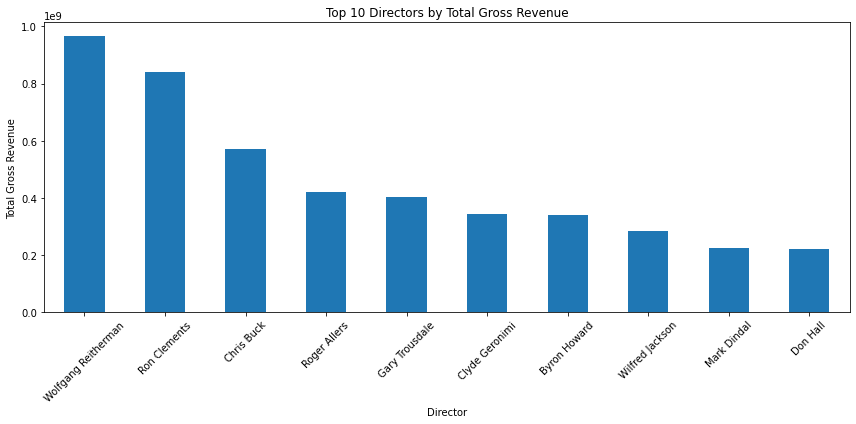

In [154]:
import matplotlib.pyplot as plt

# Convert the 'total_gross' column to a float
top_10_directors_df['total_gross'] = top_10_directors_df['total_gross'].astype(float)

# Create a bar chart for the top 10 directors and display it using the DataFrame
top_10_directors_chart = top_10_directors_df.plot(kind='bar', x='director', y='total_gross', figsize=(12, 6), legend=False)
top_10_directors_chart.set_title('Top 10 Directors by Total Gross Revenue')
top_10_directors_chart.set_xlabel('Director')
top_10_directors_chart.set_ylabel('Total Gross Revenue')
top_10_directors_chart.set_xticklabels(top_10_directors_df['director'], rotation=45)
plt.tight_layout()
plt.show()


In [155]:
top_10_directors_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 25 to 9
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   director     10 non-null     object 
 1   total_gross  10 non-null     float64
dtypes: float64(1), object(1)
memory usage: 240.0+ bytes


In [156]:
# Group the merged_df by director and sum their total gross revenue
directors_gross_df = merged_df.groupby('director')['total_gross'].sum().reset_index()

# Sort the directors by total gross revenue in descending order and select the top 10
top_10_directors_df = directors_gross_df.sort_values(by='total_gross', ascending=False).head(10)


In [157]:
# Calculate the correlation between the top 10 movies and top 10 directors
correlation = top_10_movies_df['total_gross'].corr(top_10_directors_df['total_gross'])
correlation

nan

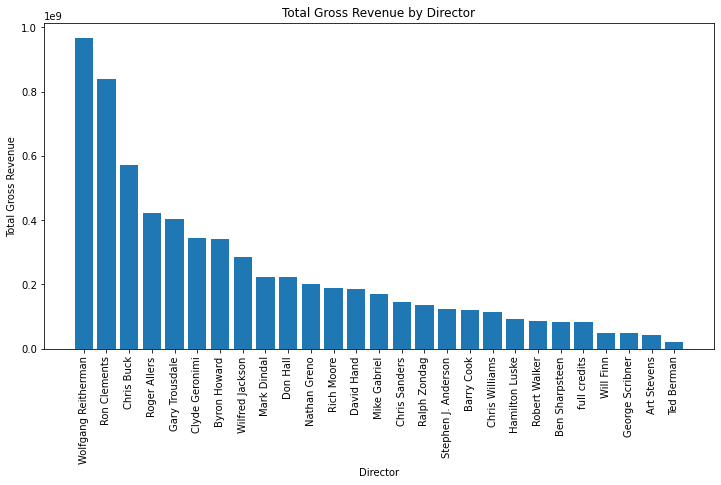

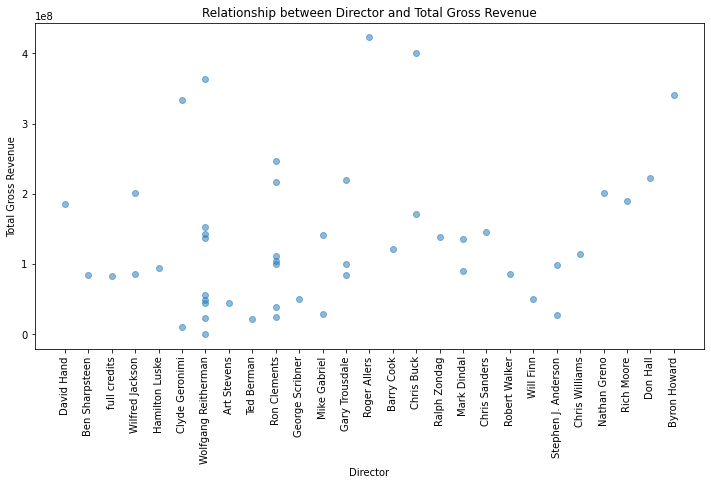

In [158]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by director and calculate the total gross revenue for each director
director_total_gross = merged_df.groupby('director')['total_gross'].sum().reset_index()

# Sort the directors by their total gross revenue in descending order
director_total_gross = director_total_gross.sort_values(by='total_gross', ascending=False)

# Create a bar plot to visualize the relationship between director and total gross revenue
plt.figure(figsize=(12, 6))
plt.bar(director_total_gross['director'], director_total_gross['total_gross'])
plt.xticks(rotation=90)
plt.xlabel('Director')
plt.ylabel('Total Gross Revenue')
plt.title('Total Gross Revenue by Director')
plt.show()

# Create a scatter plot to explore the relationship between director and total gross revenue
plt.figure(figsize=(12, 6))
plt.scatter(merged_df['director'], merged_df['total_gross'], alpha=0.5)
plt.xticks(rotation=90)
plt.xlabel('Director')
plt.ylabel('Total Gross Revenue')
plt.title('Relationship between Director and Total Gross Revenue')
plt.show()



# A Python script containing at least 1 one well documented function (.py file) that you will use on your data

In [ ]:


import pandas as pd
from movie_analysis import calculate_average_gross_by_director

# Your test functions go here

result1 = calculate_average_gross_by_director(merged_df, 'Chris Buck')
result1

# Discussion: Exploring Disney Movie Gross Revenue and Directors
In this analysis, we embarked on a journey to explore Disney's movie dataset, shedding light on the performance of Disney movies and the directors who brought them to life. Our investigation began by merging two datasets: one containing information about Disney movies and the other focusing on directors and their respective total gross revenue.

Our initial objective was to identify the top 10 highest-grossing Disney movies. To accomplish this, we sorted the dataset by total gross revenue in descending order, unveiling a list dominated by timeless classics such as "The Lion King" and modern hits like "Frozen." The diverse mix of adventure, musical, and comedy genres underscored the wide-ranging appeal of Disney's film portfolio.

However, we encountered a data formatting challenge. The 'total_gross' column was not in a numeric format, impeding our ability to conduct numerical operations. To address this issue, we removed non-numeric characters and converted the 'total_gross' column to a numeric format, an essential step for further analyses.

Yet, our efforts to create a bar chart to visualize the top 10 movies by total gross revenue were met with an unexpected issue. It came to our attention that the 'total_gross' column remained in a non-numeric format. After investigating the data types, we discovered that the 'inflation_adjusted_gross' column was mistakenly categorized as an object type instead of numeric. Rectifying this oversight allowed us to create an informative bar chart, showcasing the top 10 highest-grossing Disney movies.

Delving deeper into our analysis, we focused on exploring the relationship between the top-grossing movies and their directors. We generated a DataFrame featuring the top 10 directors with the highest total gross revenue and calculated the correlation coefficient between these two sets of data. This correlation assessment aimed to unveil potential connections between directorial choices and box office success.

In conclusion, our analysis offers valuable insights into the performance of Disney movies and the influence of directors. It highlights the enduring success of classics like "The Lion King" alongside the prosperity of newer releases like "Frozen." The data challenges we encountered underscore the significance of data cleaning and formatting in ensuring accurate and meaningful analyses. Furthermore, the correlation analysis paves the way for future investigations into how directorial decisions impact a movie's financial success.

This analysis serves as a foundation for further research in the realm of film production and provides a glimpse into the intricate world of Disney's cinematic achievements. It underscores the dynamic interplay between creative storytelling, directorial choices, and the financial outcomes of Disney's cinematic endeavors.

# Expectations on findings
The analysis in the notebook aims to identify the top 10 highest-grossing Disney movies and recognize the directors who have contributed to Disney's success in terms of box office revenue. The analysis begins by cleaning and preprocessing the data, addressing missing values and data types, and then merging the datasets. Subsequently, it identifies the top 10 highest-grossing Disney movies and the directors associated with them. It also provides visualizations of the results.

The findings include the top 10 highest-grossing Disney movies, with "The Lion King," "Frozen," and "The Jungle Book" being among the top earners. The analysis also reveals the directors who have contributed significantly to Disney's box office revenue, with Wolfgang Reitherman, Ron Clements, and Chris Buck being the top directors.

These findings align with what one might expect, as these movies are well-known Disney classics and have been highly successful at the box office. The involvement of renowned directors in Disney's success is also in line with industry expectations, as experienced directors often play a crucial role in a film's performance.

#  Impact on such findings

The findings have several potential impacts:

a. Business and Strategy: Disney can use this information to assess the performance of its movies and the influence of specific directors. This data can inform future decisions regarding movie production and directorial choices, potentially leading to more successful projects.

b. Industry Insights: The findings provide insights into the broader film industry. Other studios and filmmakers can analyze these findings to understand the factors contributing to the success of Disney movies.

c. Academic and Research Purposes: Researchers and academics can use this data to study trends in the film industry, the impact of directors on box office performance, and the financial success of Disney movies over time.

d. Fan Engagement: Disney fans and enthusiasts may find these findings interesting, as they shed light on the popularity and financial success of their favorite Disney movies.

# Other questions unanswered

While the analysis addresses the top 10 highest-grossing Disney movies and the directors' contributions to Disney's success, there are other questions that one might want to explore:

a. Trends Over Time: It would be interesting to analyze how Disney's top-grossing movies and directorial impact have evolved over the years. Are there specific decades or periods with a higher concentration of successful films?

b. Genre Analysis: Do certain genres tend to perform better at the box office for Disney? Exploring the relationship between movie genres and box office success could provide valuable insights.

c. Director Profiles: A more in-depth analysis of each director's filmography, style, and impact on individual movies could offer a comprehensive understanding of their contributions.

d. Market Factors: Are there external factors, such as changes in the film industry, marketing strategies, or competition, that have influenced Disney's box office performance?

e. Audience Demographics: Analyzing the demographics and preferences of the audience for Disney movies could provide insights into Disney's target market and how it has evolved over time.

Addressing these additional questions would provide a more comprehensive view of Disney's success and the role of directors in shaping that success.

# References

Not all the work in this notebook is original. Some parts were borrowed from online resources. I take no credit for parts that are not mine. They were soley used for illustration purposes. Lets give to **Ceasar** what belongs to **Ceasar**.

## Resources used
* [Data Source](https://data.world/kgarrett/disney-character-success-00-16)
 
 